## Timestamp Range

In [1]:
from pymongo import MongoClient
import matplotlib.pyplot as plt
import numpy as np

db = MongoClient('mongodb://143.215.138.132:27017')['big_data']

In [ ]:
# Sample Tweet:
# {   "_id" : ObjectId("5819377b8548676a7239588c"),
#     "guid" : "793613871756013568",
#     "text" : "#incrediblessuperdanceparty can you play all of the Spanish  songs?!",
#     "author_id" : "770418732665565185",
#     "author_name" : "Kayle Figueiredo",
#     "author_followers_count" : 15,
#     "timestamp" : 1478047266,
#     "lon" : -83.804475,
#     "lat" : 27.698681999999998,
#     "words" : [ "can", "you", "play", "all", "of", "the", "spanish", "songs" ],
#     "keywords" : [ "play", "songs", "spanish" ],
#     "hashtags" : [ "incrediblessuperdanceparty" ],
#     "mentions_id" : [ ],
#     "mentions_name" : [ ],
#     "urls" : [ ],
#     "favorite_count" : 0,
#     "retweet_count" : 0 }

In [2]:
def find_first_timestamp():
    sort = {'$sort': {'timestamp': 1}}
    limit  = {'$limit': 1}
    pipeline = [sort, limit]
    return list(db.tweet_subset.aggregate(pipeline))[0]['timestamp']

In [3]:
def find_last_timestamp():
    sort = {'$sort': {'timestamp': -1}}
    limit  = {'$limit': 1}
    pipeline = [sort, limit]
    return list(db.tweet_subset.aggregate(pipeline))[0]['timestamp']

In [4]:
def get_timestamp_list():
    timestamp_list = []
    for tweet in list(db.tweet_subset.find()):
        timestamp_list.append(tweet['timestamp'])
    return timestamp_list

In [5]:
%time print find_first_timestamp()

1477088104
CPU times: user 3.89 ms, sys: 2.01 ms, total: 5.89 ms
Wall time: 5 s


In [6]:
%time print find_last_timestamp()

1491638260
CPU times: user 2.54 ms, sys: 2.64 ms, total: 5.18 ms
Wall time: 5.05 s


In [7]:
%time print min(get_timestamp_list())

1477088104
CPU times: user 23.1 s, sys: 5.92 s, total: 29 s
Wall time: 3min


In [8]:
%time print max(get_timestamp_list())

1491638260
CPU times: user 21.3 s, sys: 5.67 s, total: 27 s
Wall time: 2min 36s


## Histogram

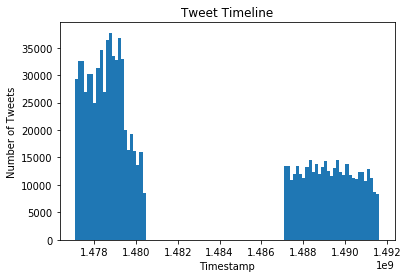

In [9]:
timestamp_list = get_timestamp_list()

bins = np.linspace(find_first_timestamp(), find_last_timestamp(), 100)

plt.hist(timestamp_list, bins=bins)

plt.title('Tweet Timeline')
plt.xlabel('Timestamp')
plt.ylabel('Number of Tweets')

plt.show()